In [32]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
import dsi
utils = reload(utils)
pt = reload(pt)
dsi = reload(dsi)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [43]:
Nx, Ny = 301, 20
# Nx, Ny = 1201, 80
ib = False
st = False

N = 1

def load(Nx,Ny,et):
    base_fn = 'output_baldauf_brdar'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

long_nonhydro_debug_best


/home/ray/git-projects/RKLM_Reference/visualiser_debugger/plotting_tools.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.arr_lst = np.array(arr_lst)


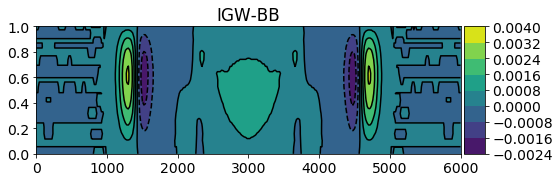

In [44]:
l_typ = 'WINDOW_STEP'
if st: l_typ = 'TIME'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False)[1]

    label = sfx + '_' + attribute
    return label, ens.T

typ = 'nonhydro'
# typ = 'nonhydro_fullfull'
typ = 'nonhydro_debug_best'
# typ = 'hydro'
# typ = 'hydro_imbal'
# typ = 'hydro_noreset'
# typ = 'hydro_perturb'
# typ = 'psinc'

et = 39.4
sfx1 = 'long_%s' %typ
if ib: sfx1 = '%s_ib-0' %sfx1
if st: sfx1 = '%s_st' %sfx1
print(sfx1)

tc, tags = load(Nx,Ny,et)
times = [56]
if st: times = [39.356]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rhoY'
_, a2 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'p2_nodes'
_, a3 = get_ens(tc, times, sfx1, diff, attribute)

la = 'IGW-BB'
aa = a2 / a1
aa -= S0 #* ud.T_ref
aa = aa[i2] * ud.T_ref
# aa *= ud.T_ref
# aa = a3
# sigma = 0.78
# aa = gaussian_filter(aa, sigma)

if sfx1 == 'long':
    lvls = np.arange(-2.5,4.0,0.5) * 1e-3
#     lvls = np.arange(-0.1,11,1) * 1e-3
    lvls = np.arange(-0.0025,0.00295,0.000496)

ll = [aa, la]
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
x_axs = np.array([0,1000,2000,3000,4000,5000,6000])
# y_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
x_loc = np.linspace(0,Nx-1,7)
y_loc = np.linspace(0,Ny-1,6)
# x_label = r'x [$\times 10$ km]'
# y_label = r'y [$\times 10$ km]'

pl.set_axes(y_locs=y_loc,y_axs=y_axs, x_locs=x_loc,x_axs=x_axs)
# pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
_ = pl.plot(method='contour', lvls=None)

# lbl = 'swe' if swe else 'euler'
# pl.save_fig('initial_vortex_%s' %lbl)

Acoustic-inertia wave profiles

[ 0.     1.23   2.46   3.69   4.92   6.149  7.379  8.609  9.839 11.069
 12.299 13.529 14.759 15.989 17.218 18.448 19.678 20.908 22.138 23.368
 24.598 25.828 27.058 28.287 29.517 30.747 31.977 33.207 34.437 35.667
 36.897 38.127 39.356]
long_nonhydro_debug_best
1.010691e-06


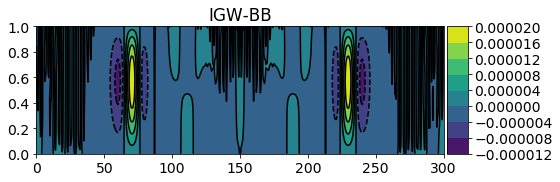

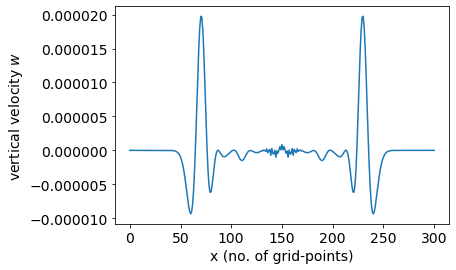

In [45]:
# l_typ = 'WINDOW_STEP'
diff = False
bld_debug = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False, load_ic=False)[0]

    label = sfx + '_' + attribute
    return label, ens.T

tc, tags = load(Nx,Ny,et)
times = [0]
times = [260]
if st: times = [39.356]
poss = np.arange(0.0,8.25,0.25) * 3600 / ud.t_ref
poss = np.around(poss,3)
print(poss)
times = [poss[-2]]
times = [56]

if bld_debug == True:
    times = [1]
    
print(sfx1)

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
if bld_debug == True:
    attribute = 'ret_full'
else:
    attribute = 'rhov'
_, a2 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'p2_nodes'
_, a3 = get_ens(tc, times, sfx1, diff, attribute)

la = 'IGW-BB'
aa = a2 / a1
# aa = a3
aa = aa[i2]

if sfx1 == 'long':
    lvls = np.arange(-2.5,4.0,0.5) * 1e-3
#     lvls = np.arange(-0.1,11,1) * 1e-3
    lvls = np.arange(-0.0025,0.00295,0.000496)

ll = [aa, la]
pl_lst = [ll]

pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
y_loc = np.linspace(0,Ny-1,6)
pl.set_axes(y_locs=y_loc,y_axs=y_axs)
_ = pl.plot(method='contour', lvls=None)

slc = slice(130,170)
slc = slice(None,)
plt.figure()
plt.plot(aa[11][slc])
print(np.max(np.abs(aa[11][130:170])))
plt.ylabel('vertical velocity $w$')
plt.xlabel('x (no. of grid-points)')
plt.show()


# amplitude difference

# Time-shift comparisons

In [36]:
Nx, Ny = 301, 20
# Nx, Ny = 1201, 80
ib = False
st = False
p2n = False

imbal = True
Xv = 'v'

N = 1

def load(Nx,Ny,et):
    base_fn = 'output_baldauf_brdar'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

#######################################################

l_typ = 'WINDOW_STEP'
if st: l_typ = 'TIME'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False, load_ic=False)

    label = sfx + '_' + attribute
    return label, ens

typ1 = 'nonhydro'
# typ1 = 'hydro'
# typ1 = 'psinc'

et = 39.4
sfx1 = 'long_%s' %typ1
# sfx1 = 'planetary_%s' %typ1
if imbal: sfx1 += '_imbal_best'
if ib: sfx1 = '%s_ib-0' %sfx1
if st: sfx1 = '%s_st' %sfx1

tc, tags = load(Nx,Ny,et)
t_idx = 40
times = [t_idx-1,t_idx,t_idx+1]
# times = [0,1,2]
if st: times = [39.356]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

dy = elem.dy
daxs = 0

S0 = (ud.stratification(elem.y)).reshape(-1,1)
print('sfx1:', sfx1)
la = 'IGW-BB'

def get_wave(tc, times, sfx1):
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rho%s' %Xv
    _, a2 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'p2_nodes'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute)

    aa_m1 = a2[0] / a1[0]
    aa_nw = a2[1] / a1[1]
    aa_p1 = a2[2] / a1[2]

    if p2n: 
        aa_m1 = a3[0]
        aa_nw = a3[1]
        aa_p1 = a3[2]

    aa_m1 = aa_m1[i2].T
    aa_nw = aa_nw[i2].T
    aa_p1 = aa_p1[i2].T

    attribute = 'rho_half'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rho%s_half' %Xv
    _, a2 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'p2_nodes_half'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute)

    aa_m1half = a2[0] / a1[0]
    aa_nwhalf = a2[1] / a1[1]
    aa_p1half = a2[2] / a1[2]

    if p2n:
        aa_m1half = a3[0]
        aa_nwhalf = a3[1]
        aa_p1half = a3[2]

    aa_m1half = aa_m1half[i2].T
    aa_nwhalf = aa_nwhalf[i2].T
    aa_p1half = aa_p1half[i2].T
    
    return np.array([[aa_m1,aa_nw,aa_p1],[aa_m1half,aa_nwhalf,aa_p1half]]) * ud.h_ref / ud.t_ref

#################################################
#
# hydro
#
#################################################

nh = get_wave(tc,times,'long_nonhydro_imbal_best_ib-0')

#################################################
#
# non-hydro
#
#################################################

typ2 = 'nonhydro'
# sfx2 = 'long_%s_ib-0' %typ2
sfx2 = 'long_%s' %typ2
# if imbal: sfx2 += '_imbal'
# sfx2 = 'planetary_%s' %typ2
print('sfx2:', sfx2)

nhbal = get_wave(tc,times,sfx2)


#################################################
#
# hydro (bal)
#
#################################################

typ3 = 'hydro'
typ3 = 'hydro_perturb'
# sfx3 = 'long_%s_ib-0' %typ3
sfx3 = 'long_%s' %typ3
# if imbal: sfx3 += '_imbal'
# sfx3 = 'planetary_%s' %typ3
print('sfx3:', sfx3)

hbal = get_wave(tc,times,sfx3)
h = get_wave(tc,times,sfx3)

nh_imbal_noib = get_wave(tc, times, 'long_nonhydro_imbal')
nh_m2 = get_wave(tc,times,'long_nonhydro_imbal_best_reset_ib-0')
h_m2 = get_wave(tc,times,'long_hydro_imbal_m2')

# pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
x_axs = np.array([0,1000,2000,3000,4000,5000,6000])
# y_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
x_loc = np.linspace(0,Nx-1,7)
y_loc = np.linspace(0,Ny-1,6)
# x_label = r'x [$\times 10$ km]'
# y_label = r'y [$\times 10$ km]'

# pl.set_axes(y_locs=y_loc,y_axs=y_axs, x_locs=x_loc,x_axs=x_axs)
# pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
# _ = pl.plot(method='contour', lvls=None)

# lbl = 'swe' if swe else 'euler'
# pl.save_fig('initial_vortex_%s' %lbl)

t_slc = slice(55,100)
t_slc = slice(None,)

# aa_nh_nw = np.roll(aa_nh_nw,1)
# fac_full = 0.5
# fac_half = 1.0 - fac_full

# fac_full = 0.0
# fac_half = 0.5
# mix = fac_full * aa_p1half + fac_half * aa_nwhalf

lbl = 'hydro n (imbal IC)' if typ1 == 'hydro' else 'nonhydro n (imbal IC, IB)'
for idx in range(9,10):
    plt.figure(figsize=(12,6))
#     plt.plot(h[0][0][idx][t_slc], 'C0', label='hydro n-1')
    plt.plot(h[0][1][idx][t_slc], 'C0', label='hydro n')
#     plt.plot(h_m2[0][1][idx][t_slc], 'C2', label='hydro_m2 n')
#     plt.plot(h[0][2][idx][t_slc], 'C2', label='hydro n+1')

#     plt.plot(h[1][0][idx][t_slc], 'C0--', label='hydro n-3/2')
#     plt.plot(h[1][1][idx][t_slc], 'C1--', label='hydro n-1/2')
#     plt.plot(h[1][2][idx][t_slc], 'C2--', label='hydro n+1/2')

#     plt.plot(nh[0][0][idx][t_slc], 'C1', label='nonhydro n-1 (imbal IC, IB)')
    plt.plot(nh[0][1][idx][t_slc], 'C1', markevery = 4, label='nonhydro w/ initial blending (imbal. IC)')
#     plt.plot(nh_m2[0][1][idx][t_slc], 'C3', label='nonhydro reset n (imbal IC, IB)')
#     plt.plot(nh[0][2][idx][t_slc], 'C2', label='nonhydro n+1 (imbal IC, IB)')

#     plt.plot(nh[1][0][idx][t_slc], 'C0--', label='hydro n-3/2')
#     plt.plot(nh[1][1][idx][t_slc], 'C1--', label='hydro n-1/2')
#     plt.plot(nh[1][2][idx][t_slc], 'C2--', label='hydro n+1/2')

#     plt.plot(nhbal[0][0][idx][t_slc], 'C6', label='nonhydro n-1')
#     plt.plot(nhbal[0][1][idx][t_slc], 'C7--', label='nonhydro n (bal IC)')
#     plt.plot(nhbal[0][2][idx][t_slc], 'C8', label='nonhydro n+1')

#     plt.plot(nhbal[1][0][idx][t_slc], 'C6', label='nonhydro n-3/2')
#     plt.plot(nhbal[1][1][idx][t_slc], 'C7--', label='nonhydro n-1/2')
#     plt.plot(nhbal[1][2][idx][t_slc], 'C8', label='nonhydro n+1/2')

#     plt.plot(hbal[0][0][idx][t_slc], 'C6', label='hydro n-1')
#     plt.plot(hbal[0][2][idx][t_slc], 'C8', label='hydro n+1')

#     plt.plot(hbal[1][0][idx][t_slc], 'C6', label='hydro n-3/2')
#     plt.plot(hbal[1][1][idx][t_slc], 'C7--', laberet[0])
#     plt.plot(hbal[1][2][idx][t_slc], 'C8', label='hydro n+1/2')

#     plt.plot(nh_imbal_noib[0][1][idx][t_slc], 'C7-', ms=5.0, markevery=4, label='nonhydro (imbal. IC)')
#     plt.plot(nh[0][1][idx][t_slc], 'C6-', lw=4, markevery = 4, label='nonhydro w/ initial\nblending (imbal. IC)',dashes=(3,5))
#     plt.plot(hbal[0][1][idx][t_slc], 'C4-', ms=5.0, markevery=4, label='hydro (bal. IC)')
#     plt.plot(nh[0][1][idx][t_slc] - hbal[0][1][idx][t_slc], 'C9', label='difference')

#     plt.plot(np.abs(nh_m2[0][1][idx][t_slc] - hbal[0][1][idx][t_slc]), 'C3--', label='|orange - grey| in Fig 1c')
#     plt.plot(np.abs(nh[0][1][idx][t_slc] - hbal[0][1][idx][t_slc]), 'C0', label='|orange - grey| in Fig 2c')
#     plt.plot(np.abs(h_m2[0][1][idx][t_slc] - hbal[0][1][idx][t_slc]), 'C3--', label='|orange - grey| in Fig 1a')
#     plt.plot(np.abs(h[0][1][idx][t_slc] - hbal[0][1][idx][t_slc]), 'C0', label='|orange - grey| in Fig 2a')

#     plt.plot(mix[idx][t_slc], 'C9-', label='mixed')

    plt.legend()
    plt.grid()
#     plt.title("%i" %idx)
    plt.xlim([0,300])
    plt.xticks(np.arange(0,350,50), np.arange(-3000,4000,1000))
    plt.ylabel('vertical velocity $w$ [m s$^{-1}$]')
    plt.xlabel(r'$x$ [km]')
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#     plt.ylim([-0.5*1e-7,9.9*1e-7])
#     plt.show()
    plt.tight_layout()
    plt.savefig('output/nhhnhImbal.pdf', bbox_inches='tight')


sfx1: long_nonhydro_imbal_best
sfx2: long_nonhydro
sfx3: long_hydro_perturb


KeyError: "Unable to open object (object 'rho_039_after_full_step' doesn't exist)"

#### Substep time-levels

sfx1: long_nonhydro_ib-0


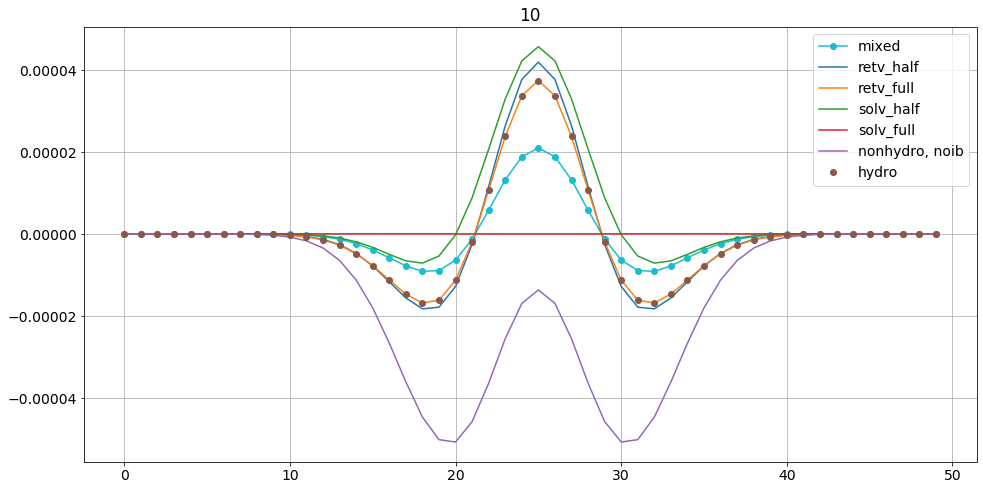

In [259]:
Nx, Ny = 301, 20
# Nx, Ny = 1201, 80
ib = True
st = False
p2n = False
gradz = False
bld_debug = True


Xv = 'Y'
use_aef = False
use_afs = False
use_ahs = False


N = 1

def load(Nx,Ny,et):
    base_fn = 'output_baldauf_brdar'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

#######################################################

l_typ = 'WINDOW_STEP'
if st: l_typ = 'TIME'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute, tag):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=False, load_ic=False)

    label = sfx + '_' + attribute
    return label, ens

typ = 'nonhydro'
# typ = 'hydro'
# typ = 'psinc'

et = 39.4
sfx1 = 'long_%s' %typ
if ib: sfx1 = '%s_ib-0' %sfx1
if st: sfx1 = '%s_st' %sfx1

tc, tags = load(Nx,Ny,et)
afs = tags[9] # after full step
aef = tags[9] # after explicit euler forward
ahs = tags[9]
times = [48,49,50]
if st: times = [39.356]
if bld_debug: times = [1]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

dy = elem.dy
daxs = 0

S0 = (ud.stratification(elem.y)).reshape(-1,1)
print('sfx1:', sfx1)
la = 'IGW-BB'

#################################################
#
# aef
#
#################################################

if use_aef:
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute, aef)
    attribute = 'rho%s' %Xv
    _, a2 = get_ens(tc, times, sfx1, diff, attribute, aef)
    attribute = 'p2_nodes'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute, aef)

    aa_m1 = a2[0] / a1[0]
    aa_nw = a2[1] / a1[1]
    aa_p1 = a2[2] / a1[2]

    if p2n: 
        aa_m1 = a3[0]
        aa_nw = a3[1]
        aa_p1 = a3[2]

        if gradz:
            aa_m1 = np.gradient(aa_m1,dy,axis=daxs)
            aa_nw = np.gradient(aa_nw,dy,axis=daxs)
            aa_p1 = np.gradient(aa_p1,dy,axis=daxs)

    aa_m1 = aa_m1[i2].T
    aa_nw = aa_nw[i2].T
    aa_p1 = aa_p1[i2].T


#################################################
#
# afs
#
#################################################

if use_afs:
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute, afs)
    attribute = 'rho%s' %Xv
    _, a2 = get_ens(tc, times, sfx1, diff, attribute, afs)
    attribute = 'p2_nodes'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute, afs)

    aa_m1half = a2[0] / a1[0]
    aa_nwhalf = a2[1] / a1[1]
    aa_p1half = a2[2] / a1[2]

    if p2n:
        aa_m1half = a3[0]
        aa_nwhalf = a3[1]
        aa_p1half = a3[2]

        if gradz:
            aa_m1half = np.gradient(aa_m1half,dy,axis=daxs)
            aa_nwhalf = np.gradient(aa_nwhalf,dy,axis=daxs)
            aa_p1half = np.gradient(aa_p1half,dy,axis=daxs)

    aa_m1half = aa_m1half[i2].T
    aa_nwhalf = aa_nwhalf[i2].T
    aa_p1half = aa_p1half[i2].T
    
#################################################
#
# ahs
#
#################################################

if use_ahs:
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'rho%s' %Xv
    _, a2 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'p2_nodes'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute, ahs)

    aa_nh_m1 = a2[0] / a1[0]
    aa_nh_nw = a2[1] / a1[1]
    aa_nh_p1 = a2[2] / a1[2]

    if p2n:
        aa_nh_m1 = a3[0]
        aa_nh_nw = a3[1]
        aa_nh_p1 = a3[2]

        if gradz:
            aa_nh_m1 = np.gradient(aa_nh_m1,dy,axis=daxs)
            aa_nh_nw = np.gradient(aa_nh_nw,dy,axis=daxs)
            aa_nh_p1 = np.gradient(aa_nh_p1,dy,axis=daxs)

    aa_nh_m1 = aa_nh_m1[i2].T
    aa_nh_nw = aa_nh_nw[i2].T
    aa_nh_p1 = aa_nh_p1[i2].T
    
#################################################
#
# bld_debug
#
#################################################

if bld_debug:
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'ret_half'
    _, a2 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'ret_full'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'solv_half'
    _, a4 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'solv_full'
    _, a5 = get_ens(tc, times, sfx1, diff, attribute, ahs)

    retv_half = a2[0] / a1[0]
    retv_full = a3[0] / a1[0]
    solv_half = a4[0] / a1[0]
    solv_full = a5[0] / a1[0]

    retv_half = retv_half[i2].T
    retv_full = retv_full[i2].T
    solv_half = solv_half[i2].T
    solv_full = solv_full[i2].T
    

#################################################
#
# ib_false
#
#################################################

    ib = False

    typ = 'nonhydro'
    sfx1 = 'long_%s' %typ

    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'rhov'
    _, a2 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    
    noib = a2[0] / a1[0]
    noib = noib[i2].T
    
    typ = 'hydro'
    sfx1 = 'long_%s' %typ

    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    attribute = 'rhov'
    _, a2 = get_ens(tc, times, sfx1, diff, attribute, ahs)
    
    hydro = a2[0] / a1[0]
    hydro = hydro[i2].T


# pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
x_axs = np.array([0,1000,2000,3000,4000,5000,6000])
# y_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
x_loc = np.linspace(0,Nx-1,7)
y_loc = np.linspace(0,Ny-1,6)
# x_label = r'x [$\times 10$ km]'
# y_label = r'y [$\times 10$ km]'

# pl.set_axes(y_locs=y_loc,y_axs=y_axs, x_locs=x_loc,x_axs=x_axs)
# pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
# _ = pl.plot(method='contour', lvls=None)

# lbl = 'swe' if swe else 'euler'
# pl.save_fig('initial_vortex_%s' %lbl)

if bld_debug:
    t_slc = slice(125,175)
else:
    t_slc = slice(65,100)
# t_slc = slice(None,)
# t_slc = slice(220,245)

# aa_nh_nw = np.roll(aa_nh_nw,1)
fac_full = 0.5
fac_half = 1.0 - fac_full


for idx in range(10,11):
    plt.figure(figsize=(16,8))
    
    if use_aef:
        plt.plot(aa_m1[idx][t_slc], 'C0o', label='n-1 aef')
        plt.plot(aa_nw[idx][t_slc], 'C1o', label='n aef')
        plt.plot(aa_p1[idx][t_slc], 'C2o', label='n+1 aef')

    if use_afs:
        plt.plot(aa_m1half[idx][t_slc], 'C0', label='n-1 afs')
        plt.plot(aa_nwhalf[idx][t_slc], 'C1', label='n afs')
        plt.plot(aa_p1half[idx][t_slc], 'C2', label='n+1 afs')

    if use_ahs:
        plt.plot(aa_nh_m1[idx][t_slc], 'C6x', label='n-1 ahs')
        plt.plot(aa_nh_nw[idx][t_slc], 'C7x', label='n ahs')
        plt.plot(aa_nh_p1[idx][t_slc], 'C8x', label='n+1 ahs')
        
    if bld_debug:
        mix = fac_full * solv_full + fac_half * retv_half
        plt.plot(mix[idx][t_slc], 'C9-o', label='mixed')
        
        plt.plot(retv_half[idx][t_slc], 'C0', label='retv_half')
        plt.plot(retv_full[idx][t_slc], 'C1', label='retv_full')
        plt.plot(solv_half[idx][t_slc], 'C2', label='solv_half')
        plt.plot(solv_full[idx][t_slc], 'C3', label='solv_full')
        
#         noib[idx] = noib[idx] - noib[idx].mean()
        plt.plot(noib[idx][t_slc], 'C4', label='nonhydro, noib')
        plt.plot(hydro[idx][t_slc], 'C5o', label='hydro')
        
#     plt.plot(aa_nh_m1half[idx][t_slc], 'C6o', label='nonhydro n-3/2')
#     plt.plot(aa_nh_nwhalf[idx][t_slc], 'C7o', label='nonhydro n-1/2')
#     plt.plot(aa_nh_p1half[idx][t_slc], 'C8o', label='nonhydro n+1/2')
    


    plt.legend()
    plt.grid()
    plt.title("%i" %idx)
#     plt.xlim([75,100])
    plt.show()


sfx1: long_hydro
sfx2: long_nonhydro
sfx2: long_nonhydro_ib-0


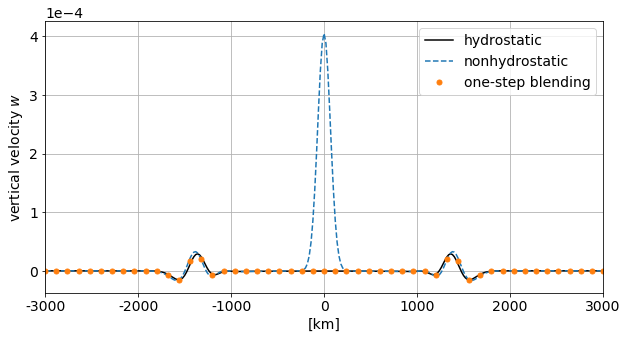

In [32]:
Nx, Ny = 301, 20
# Nx, Ny = 1201, 80
ib = False
st = False
p2n = False
gradz = False
Xv = 'v'

N = 1

def load(Nx,Ny,et):
    base_fn = 'output_baldauf_brdar'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

#######################################################

l_typ = 'WINDOW_STEP'
if st: l_typ = 'TIME'
diff = False

attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag='after_full_step', inner=False, load_ic=False)

    label = sfx + '_' + attribute
    return label, ens

typ = 'nonhydro'
typ = 'hydro'
# typ = 'psinc'

et = 39.4
sfx1 = 'long_%s' %typ
if ib: sfx1 = '%s_ib-0' %sfx1
if st: sfx1 = '%s_st' %sfx1

tc, tags = load(Nx,Ny,et)
times = [48,49,50]
# times = [0,1,2]
if st: times = [39.356]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
mpv = pickle.load(file)
dap = pickle.load(file)
elem = pickle.load(file)
file.close()

dy = elem.dy
daxs = 0

S0 = (ud.stratification(elem.y)).reshape(-1,1)
print('sfx1:', sfx1)
la = 'IGW-BB'

#################################################
#
# hydro
#
#################################################

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rho%s' %Xv
_, a2 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'p2_nodes'
_, a3 = get_ens(tc, times, sfx1, diff, attribute)

aa_m1 = a2[0] / a1[0]
aa_nw = a2[1] / a1[1]
aa_p1 = a2[2] / a1[2]

if p2n: 
    aa_m1 = a3[0]
    aa_nw = a3[1]
    aa_p1 = a3[2]
    
    if gradz:
        aa_m1 = np.gradient(aa_m1,dy,axis=daxs)
        aa_nw = np.gradient(aa_nw,dy,axis=daxs)
        aa_p1 = np.gradient(aa_p1,dy,axis=daxs)

aa_m1 = aa_m1[i2].T
aa_nw = aa_nw[i2].T
aa_p1 = aa_p1[i2].T

attribute = 'rho_half'
_, a1 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'rho%s_half' %Xv
_, a2 = get_ens(tc, times, sfx1, diff, attribute)
attribute = 'p2_nodes_half'
_, a3 = get_ens(tc, times, sfx1, diff, attribute)

aa_m1half = a2[0] / a1[0]
aa_nwhalf = a2[1] / a1[1]
aa_p1half = a2[2] / a1[2]

if p2n:
    aa_m1half = a3[0]
    aa_nwhalf = a3[1]
    aa_p1half = a3[2]
    
    if gradz:
        aa_m1half = np.gradient(aa_m1half,dy,axis=daxs)
        aa_nwhalf = np.gradient(aa_nwhalf,dy,axis=daxs)
        aa_p1half = np.gradient(aa_p1half,dy,axis=daxs)

aa_m1half = aa_m1half[i2].T
aa_nwhalf = aa_nwhalf[i2].T
aa_p1half = aa_p1half[i2].T

#################################################
#
# non-hydro
#
#################################################

typ = 'nonhydro'
# sfx2 = 'long_%s_ib-0' %typ
sfx2 = 'long_%s' %typ
times = [48,49,50]
# times = [0,1,2]
# times = [47,48,49]
print('sfx2:', sfx2)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx2, diff, attribute)
attribute = 'rho%s' %Xv
_, a2 = get_ens(tc, times, sfx2, diff, attribute)
attribute = 'p2_nodes'
_, a3 = get_ens(tc, times, sfx2, diff, attribute)

aa_nh_m1 = a2[0] / a1[0]
aa_nh_nw = a2[1] / a1[1]
aa_nh_p1 = a2[2] / a1[2]

if p2n:
    aa_nh_m1 = a3[0]
    aa_nh_nw = a3[1]
    aa_nh_p1 = a3[2]
    
    if gradz:
        aa_nh_m1 = np.gradient(aa_nh_m1,dy,axis=daxs)
        aa_nh_nw = np.gradient(aa_nh_nw,dy,axis=daxs)
        aa_nh_p1 = np.gradient(aa_nh_p1,dy,axis=daxs)

aa_nh_m1 = aa_nh_m1[i2].T
aa_nh_nw = aa_nh_nw[i2].T
aa_nh_p1 = aa_nh_p1[i2].T

attribute = 'rho_half'
_, a1 = get_ens(tc, times, sfx2, diff, attribute)
attribute = 'rho%s_half' %Xv
_, a2 = get_ens(tc, times, sfx2, diff, attribute)
attribute = 'p2_nodes_half'
_, a3 = get_ens(tc, times, sfx2, diff, attribute)

aa_nh_m1half = a2[0] / a1[0]
aa_nh_nwhalf = a2[1] / a1[1]
aa_nh_p1half = a2[2] / a1[2]

if p2n:
    aa_nh_m1half = a3[0]
    aa_nh_nwhalf = a3[1]
    aa_nh_p1half = a3[2]
    
    if gradz:
        aa_nh_m1half = np.gradient(aa_nh_m1half,dy,axis=daxs)
        aa_nh_nwhalf = np.gradient(aa_nh_nwhalf,dy,axis=daxs)
        aa_nh_p1half = np.gradient(aa_nh_p1half,dy,axis=daxs)

aa_nh_m1half = aa_nh_m1half[i2].T
aa_nh_nwhalf = aa_nh_nwhalf[i2].T
aa_nh_p1half = aa_nh_p1half[i2].T


#################################################
#
# non-hydro, ib
#
#################################################

typ = 'nonhydro'
sfx2 = 'long_%s_ib-0' %typ
# sfx2 = 'long_%s' %typ
times = [48,49,50]
# times = [0,1,2]
# times = [47,48,49]
print('sfx2:', sfx2)

attribute = 'rho'
_, a1 = get_ens(tc, times, sfx2, diff, attribute)
attribute = 'rho%s' %Xv
_, a2 = get_ens(tc, times, sfx2, diff, attribute)
attribute = 'p2_nodes'
_, a3 = get_ens(tc, times, sfx2, diff, attribute)

aa_ibnh_m1 = a2[0] / a1[0]
aa_ibnh_nw = a2[1] / a1[1]
aa_ibnh_p1 = a2[2] / a1[2]

if p2n:
    aa_ibnh_m1 = a3[0]
    aa_ibnh_nw = a3[1]
    aa_ibnh_p1 = a3[2]
    
    if gradz:
        aa_ibnh_m1 = np.gradient(aa_ibnh_m1,dy,axis=daxs)
        aa_ibnh_nw = np.gradient(aa_ibnh_nw,dy,axis=daxs)
        aa_ibnh_p1 = np.gradient(aa_ibnh_p1,dy,axis=daxs)

aa_ibnh_m1 = aa_ibnh_m1[i2].T
aa_ibnh_nw = aa_ibnh_nw[i2].T
aa_ibnh_p1 = aa_ibnh_p1[i2].T

# attribute = 'rho_half'
# _, a1 = get_ens(tc, times, sfx2, diff, attribute)
# attribute = 'rho%s_half' %Xv
# _, a2 = get_ens(tc, times, sfx2, diff, attribute)
# attribute = 'p2_nodes_half'
# _, a3 = get_ens(tc, times, sfx2, diff, attribute)

# aa_nh_m1half = a2[0] / a1[0]
# aa_nh_nwhalf = a2[1] / a1[1]
# aa_nh_p1half = a2[2] / a1[2]

# if p2n:
#     aa_nh_m1half = a3[0]
#     aa_nh_nwhalf = a3[1]
#     aa_nh_p1half = a3[2]
    
#     if gradz:
#         aa_nh_m1half = np.gradient(aa_nh_m1half,dy,axis=daxs)
#         aa_nh_nwhalf = np.gradient(aa_nh_nwhalf,dy,axis=daxs)
#         aa_nh_p1half = np.gradient(aa_nh_p1half,dy,axis=daxs)

# aa_nh_m1half = aa_nh_m1half[i2].T
# aa_nh_nwhalf = aa_nh_nwhalf[i2].T
# aa_nh_p1half = aa_nh_p1half[i2].T

if sfx1 == 'long':
    lvls = np.arange(-2.5,4.0,0.5) * 1e-3
#     lvls = np.arange(-0.1,11,1) * 1e-3
    lvls = np.arange(-0.0025,0.00295,0.000496)

# ll = [aa, la]
# pl_lst = [ll]

# pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
x_axs = np.array([0,1000,2000,3000,4000,5000,6000])
# y_axs = [-0.5,-0.25,0.0,0.25,0.5]
y_axs = np.array([0.0,2.0,4.0,6.0,8.0,10.0]) / 10.0
x_loc = np.linspace(0,Nx-1,7)
y_loc = np.linspace(0,Ny-1,6)
# x_label = r'x [$\times 10$ km]'
# y_label = r'y [$\times 10$ km]'

# pl.set_axes(y_locs=y_loc,y_axs=y_axs, x_locs=x_loc,x_axs=x_axs)
# pl.set_axes(x_locs=x_loc, y_locs=y_loc, x_axs=x_axs, y_axs=y_axs, x_label=x_label, y_label=y_label)
# _ = pl.plot(method='contour', lvls=None)

# lbl = 'swe' if swe else 'euler'
# pl.save_fig('initial_vortex_%s' %lbl)

t_slc = slice(65,100)
# t_slc = slice(125,175)
t_slc = slice(None,)

# aa_nh_nw = np.roll(aa_nh_nw,1)
fac_full = 0.5
fac_half = 1.0 - fac_full

# fac_full = 0.0
# fac_half = 0.5
mix = fac_full * aa_nw + fac_half * aa_p1

for idx in range(10,11):
    plt.figure(figsize=(10,5))
#     plt.plot(aa_m1[idx][t_slc], 'C0', label='hydro n-1')
    plt.plot(aa_nw[idx][t_slc], 'k-', label='hydrostatic')
#     plt.plot(aa_p1[idx][t_slc], 'C2', label='hydro n+1')

#     plt.plot(aa_m1half[idx][t_slc], 'C0o', label='hydro n-3/2')
#     plt.plot(aa_nwhalf[idx][t_slc], 'C1o', label='hydro n-1/2')
#     plt.plot(aa_p1half[idx][t_slc], 'C2o', label='hydro n+1/2')

#     plt.plot(aa_nh_m1[idx][t_slc], 'C6', label='nonhydro n-1')
    plt.plot(aa_nh_nw[idx][t_slc], 'C0--', label='nonhydrostatic')
#     plt.plot(aa_nh_p1[idx][t_slc], 'C8', label='nonhydro n+1')

#     plt.plot(aa_nh_m1half[idx][t_slc], 'C6o', label='nonhydro n-3/2')
#     plt.plot(aa_nh_nwhalf[idx][t_slc], 'C7o', label='nonhydro n-1/2')
#     plt.plot(aa_nh_p1half[idx][t_slc], 'C8o', label='nonhydro n+1/2')

#     plt.plot(aa_ibnh_m1[idx][t_slc], 'C6', label='nonhydro n-1')
    plt.plot(aa_ibnh_nw[idx][t_slc], 'C1o', label='one-step blending', markevery=6, ms=5)
#     plt.plot(aa_ibnh_p1[idx][t_slc], 'C8', label='nonhydro n+1')
    
#     plt.plot(mix[idx][t_slc], 'C9-', label='mixed')

    plt.legend()
    plt.grid()
    plt.xlim([0,300])
    ax = plt.gca()
    ax.set_xticklabels([-3000,-2000,-1000,0,1000,2000,3000])
    ax.set_xlabel('[km]')
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ylabel(r'vertical velocity $w$')
#     plt.title("%i" %idx)
#     plt.xlim([75,100])
    plt.savefig('slides/future_work.pdf', bbox_inches='tight')
    plt.show()
